# Tyrimo tikslas:
### Išsiaiškinti, ar išmaniųjų telefonų naudojimo skatinimo kampanija paveikė įmonės įplaukas gaunamas iš privačių klientų.

## Pagrindiniai klausimai:
1) Remiantis esamais duomenimis, pasakyti, ar žmonės, kurie įsigijo išmanųjį telefoną išties padidino savo ARPU kitą mėnesį. 

2) Jeigu taip, kiek papildomai pajamų buvo sugeneruota septintą mėnesį? 
### __________________________________________

Importuojamos reikiamos bibliotekos:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Įkeliami reikalingi duomenys:

In [5]:
df = pd.read_excel('Telco sample.xlsx')

### Trumpa duomenų apžvalga:

Turime birželio ir liepos mėnesio duomenis apie vartotojų ARPU, tai yra, kiek pinigų jie išleido mobiliajam ryšiui. Taip pat žinome ir ar tais mėnesiais jie turėjo išmaniuosius telefonus.
Tyrimo metu planuojama palyginti apyvartas surinktas iš vartotojų esančių šioje duomenų bazėje. Jei liepos mėnesio apyvarta viršys birželio - tai indikuos apyvartos augimą. Jei klientų, turinčių išmaniuosius telefonus, kiekis liepos mėnesį taip pat bus didesnis nei birželio - bus galima kelti hipotezę, kad prie to prisidėjo išmaniųjų telefonų naudojimo skatinimo kampanija. 
Pateikti duomenys neatskleidžia klientų tapatybių bei amžiaus. Tad esant koreliacijai tarp išaugusio ARPU ir kliento amžiaus, mes negalėsime jos pastebėti. Tai padėtų surasti tikslinę auditoriją šiai, ar panašioms kampanijoms ateityje, ko pasekoje galimas marketingo kaštų optimizavimas. 

In [6]:
df.head()

,user_id,arpu_06,arpu_07,smartphone_06,smartphone_07
0,1,0.220782,0.939311,0,1
1,2,1.986891,3.791338,0,0
2,3,6.168302,8.661411,1,1
3,4,0.376215,0.075640,0,0
4,5,6.728990,13.664181,0,0


Šioje klientų bazėje jų yra 1475. Štai čia galime matyti, kaip skiriasi ARPU vidurkiai birželio ir liepos mėnesiais. Kol kas rezultatai džiugina, nes bendras ARPU vidurkis liepą buvo didesnis. Tačiau palyginus skirtingų mėnesių standartinius nuokrypius, galime matyti, kad birželio ARPU vidurkis daug geriau atspindėjo situaciją, nei vidurkis gautas liepą. Reikšmės 'std' eilutėje skiriasi beveik per 3 punktus. Tai rodo, kad liepos ARPU tarp klientų nėra pasisirstęs tolygiai. Ir išties - liepos mėnesio ARPU reikšmės žemesnės už birželio net iki pat 50 procentilės. Liepos mėnesio mediana taip pat yra žemesnė nei biželį. Kol kas galima daryti prielaidą, kad didelė dalis klientų kurie išleisdavo mažiau jau birželį, liepą išleidžia dar mažiau. Ir atvirkščiai, tie kas išleisdavo daugiau jau birželį (nuo 75 procentilės), liepą išleisdavo dar daugau.

In [7]:
df.describe()

,user_id,arpu_06,arpu_07,smartphone_06,smartphone_07
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000
mean,738.000000,5.014533,6.296186,0.492203,0.768814
std,425.940137,2.886219,5.581716,0.500109,0.421734
min,1.000000,0.001376,0.000406,0.000000,0.000000
25%,369.500000,2.520438,1.760033,0.000000,1.000000
50%,738.000000,5.059282,4.656095,0.000000,1.000000
75%,1106.500000,7.458897,9.698835,1.000000,1.000000
max,1475.000000,9.996441,24.287749,1.000000,1.000000


###  ARPU vidurkis ir mediana

Kaip buvo minėta anksčiau, liepos ARPU vidurkis pralenkė vidurkį gautą birželį, tačiau mediana sumažėjo, ir atsirado pusantro punkto dydžio skirtumas. Tai rodo, kad maža dalis įtin aukštų reikšmių iškreipė vidurkį. 

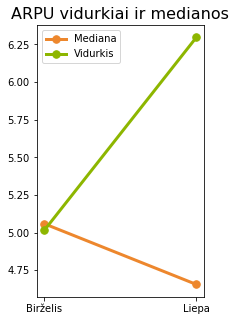

In [8]:
month_labels = ['Birželis', 'Liepa']
plt.figure(figsize=(3, 5))
arpu_medians = [df['arpu_06'].median(), df['arpu_07'].median()] 
plt.plot(month_labels, arpu_medians, label='Mediana',linewidth=3, marker='.', markersize=15, color='#ED872D')
arpu_means = [df['arpu_06'].mean(), df['arpu_07'].mean() ]

plt.plot(month_labels, arpu_means, color = '#8DB600', linewidth=3, marker='.', markersize=15, label ='Vidurkis')
plt.title('ARPU vidurkiai ir medianos', fontdict= {'fontsize': 16})
plt.legend()
plt.show()

### ARPU suma

Šiame grafike galima matyti, kad jei birželio mėnesį ARPU tarp turinčiųjų ir neturinčiųjų išmaniuosius telefonus buvo pasiskirstęs maždaug tolygiai, liepos mėnesį didžioji dalis ARPU buvo būtent klientų, turinčių išmaniuosius telefonus. 

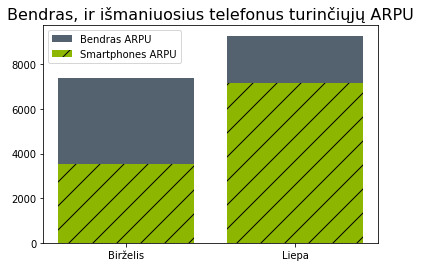

In [9]:
overall_arpu_06 = df.arpu_06.sum()
smart_arpu_06 = df['arpu_06'][df['smartphone_06'] == 1].sum()
overall_arpu_07 = df.arpu_07.sum()
smart_arpu_07 = df['arpu_07'][df['smartphone_07'] == 1].sum()

arpu_sum_bars = plt.bar(month_labels, [overall_arpu_06, overall_arpu_07], label='Bendras ARPU', color= '#54626F')
arpu_sum_bars2 = plt.bar(month_labels, [smart_arpu_06, smart_arpu_07], label='Smartphones ARPU', color = '#8DB600')
plt.title('Bendras, ir išmaniuosius telefonus turinčiųjų ARPU', fontdict= {'fontsize': 16})
arpu_sum_bars2[0].set_hatch('/')
arpu_sum_bars2[1].set_hatch('/')
plt.legend()
plt.show()

### Ar išmanieji skatina išleisti daugiau?

Iš visos bazės atrinkti pirkėjai - klientai, kurie neturėjo išmaniojo birželį, bet jau turėjo liepą. Skritulinėje diagramoje matome, kad klientai neturėję išmaniojo telefono birželio mėnesį, vidutiniškai išleisdavo po 5.15. Tie patys klientai jau įsigiję išmaniuosius telefonus, liepos mėnesį vidutiniškai išleisdavo po 6.66, kas yra beveik trečdaliu daugiau!

Tiesa, pažvelgus į medianas matosi, kad birželio mėnesio mediana yra net šiek tiek didesnė nei liepos. Tai turėtų reikšti, kad maža dalis klientų liepos mėnesį pakėlė vidurkį į aukštumas, kai tuo tarpu bendra situacija nekito taip sparčiai. 

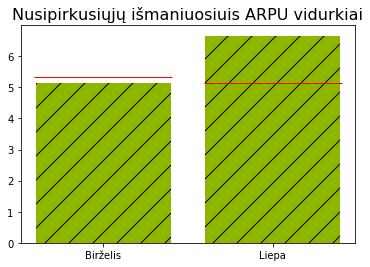

In [26]:
buyers = df.loc[(df.smartphone_06 == 0) & (df.smartphone_07 == 1)]

buyers_arpu_06_mean = buyers['arpu_06'].mean()
buyers_arpu_07_mean = buyers['arpu_07'].mean()

buyers_arpu_06_median = buyers['arpu_06'].median()
buyers_arpu_07_median = buyers['arpu_07'].median()


arpu_mean_bars = plt.bar(month_labels, [buyers_arpu_06_mean, buyers_arpu_07_mean],
       color = '#8DB600')
arpu_mean_bars[0].set_hatch('/')
arpu_mean_bars[1].set_hatch('/')
plt.plot(month_labels, [buyers_arpu_06_median, buyers_arpu_07_median],
        linewidth = 0,
        marker = '_',
        markersize = 138,
        color = 'red')
plt.title('Nusipirkusiųjų išmaniuosiuis ARPU vidurkiai', fontdict= {'fontsize': 16})

plt.show()

Pilnam vaizdui susidaryti, siūlyčiau pažvelgti į pirkėjų ARPU sumas. Matosi, kad nepasiant žemesnės medianos, bendra klientų nusipirkusių išmaniuosius išlaidų suma padidėjo. 

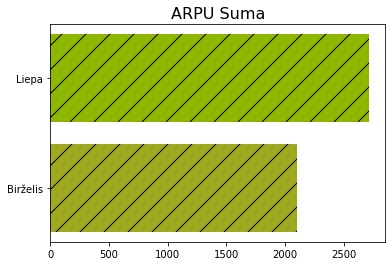

In [29]:
buyers_arpu_06_sum = buyers['arpu_06'].sum()
buyers_arpu_07_sum = buyers['arpu_07'].sum()
arpu_sum_bars = plt.barh(month_labels, [buyers_arpu_06_sum, buyers_arpu_07_sum],
        color=['#9FA91F', '#8DB600']
        )
arpu_sum_bars[0].set_hatch('/')
arpu_sum_bars[1].set_hatch('/')
plt.title('ARPU Suma', fontdict= {'fontsize': 16})
plt.show()

Text(0.5, 1.0, 'Klientai, kampanijos metu nusipirkę išmaniuosius')

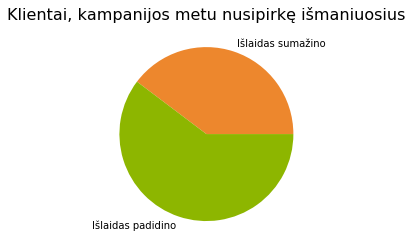

In [13]:
buyer_saver = df.loc[((df.smartphone_06 == 0) & (df.smartphone_07 == 1) & (df.arpu_06 > df.arpu_07) )]
len(buyer_saver)

plt.pie([len(buyer_saver), (len(buyers) -len(buyer_saver) )],
       labels= [ "Išlaidas sumažino",'Išlaidas padidino'],
       colors = ['#ED872D', '#8DB600']
       )
plt.title('Klientai, kampanijos metu nusipirkę išmaniuosius', fontdict= {'fontsize': 16})

### Kontrolinė grupė

Norint įsitikinti, kad pirkėjų ARPU augimas priklausė būtent dėl kampanijos, reikėtų palyginti jų ARPU augimą su klientų, kurie nedalyvavo kampanijoje. Taigi mantome, kad liepos mėnesį ARPU prieaugį turėjo net ir tie, kurie kampanijoje nedalyvavo, tieisog jų prieaugis buvo beveik 0.5 mažesnis.

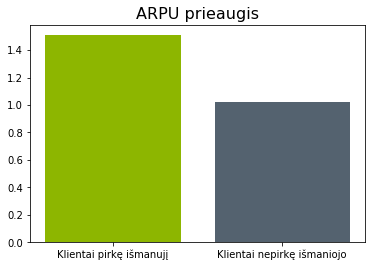

In [47]:
control = df.loc[(df.smartphone_06 == 0) & (df.smartphone_07 == 0)]
control_mean_06 = control['arpu_06'].mean()
control_mean_07 = control['arpu_07'].mean()

control_diff_means = control_mean_07 - control_mean_06
buyer_diff_means = buyers_arpu_07_mean - buyers_arpu_06_mean
plt.bar(['Klientai pirkę išmanujį', 'Klientai nepirkę išmaniojo'], [buyer_diff_means, control_diff_means],
       color = ['#8DB600', '#54626F'])

plt.title('ARPU prieaugis', fontdict= {'fontsize': 16})
plt.show()

### Iš duomenų apie pirkėjus galėčiau pateikti tokias įžvalgas:
    * Skirtingi klientai, pasinaudoję tuo pačiu pasiūlymu elgiasi skirtingai. Vieni gerokai padidino savo išlaidas, kai kurie net sumažino. 
    * Tačiau bendras rezultatas teigiamas - liepos mėnesio ARPU tikrai didesnis. 

### Papildomidomos liepos mėnesio pajamos

Liepos mėnesio ARPU viršijo Birželio net 1890 vienetais. 

In [14]:
round((df.arpu_07 - df.arpu_06).sum(), 2)

1890.44